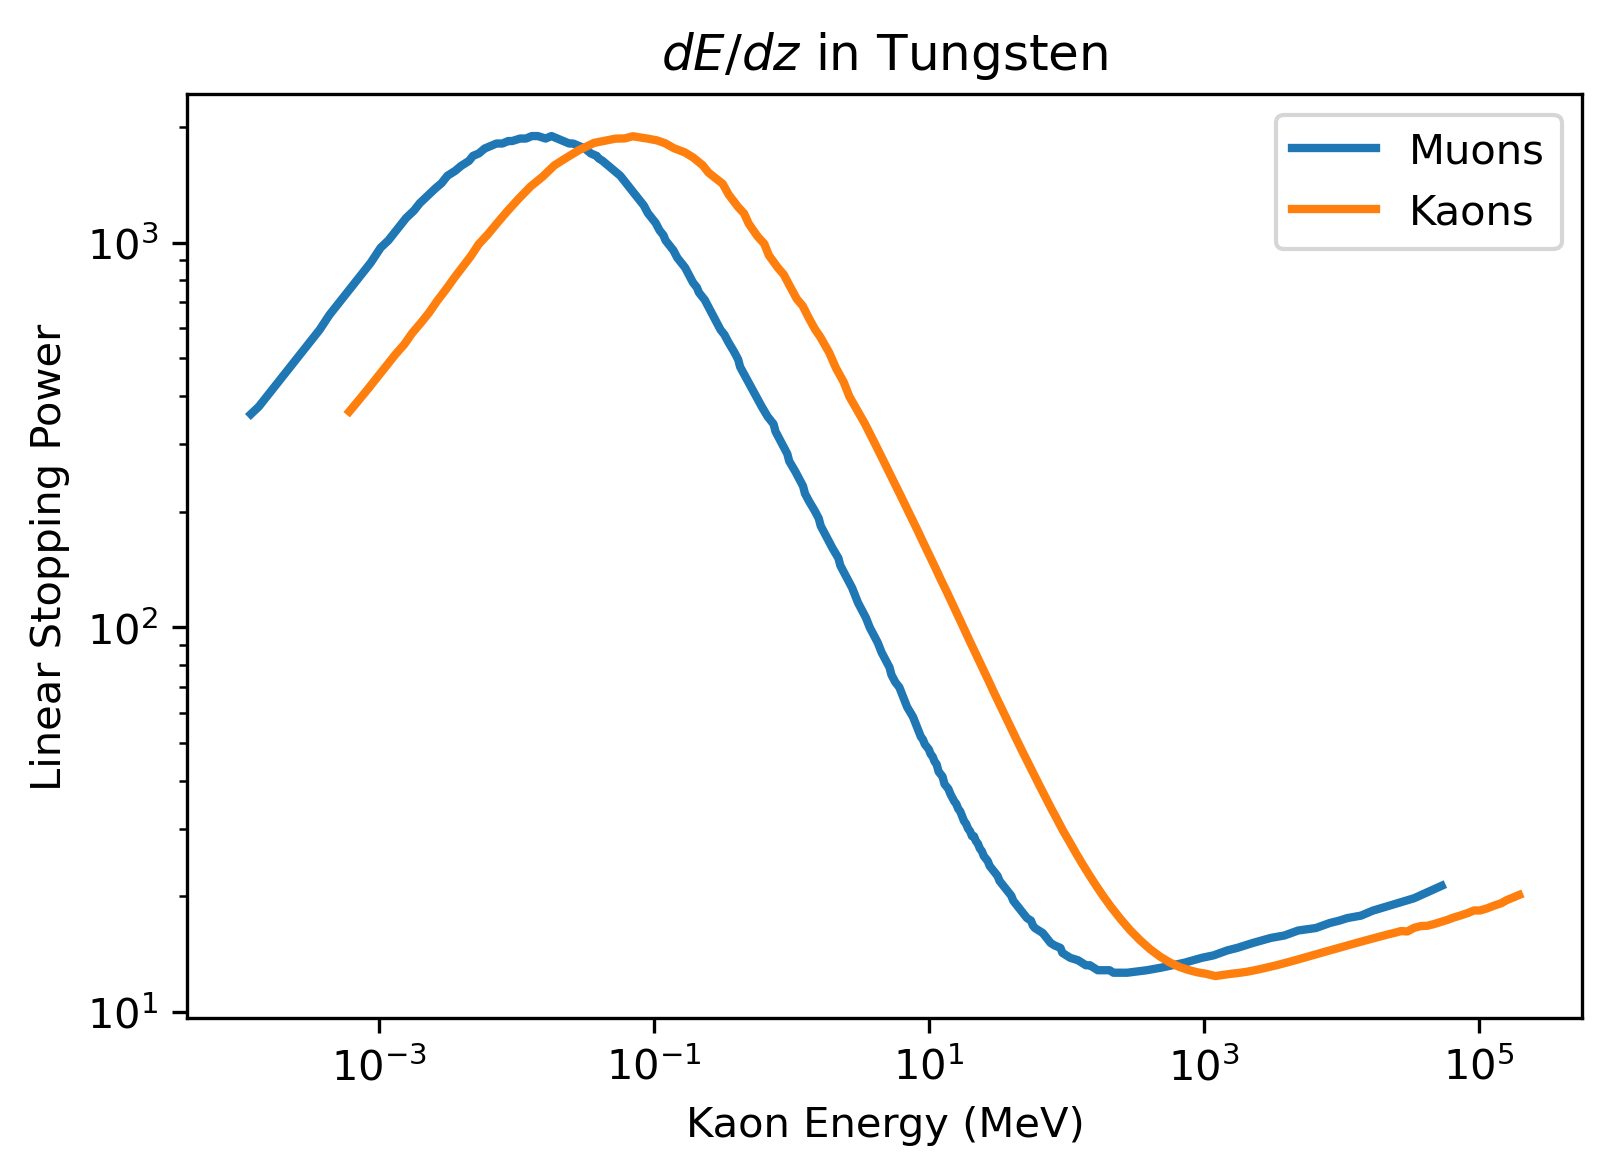

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

#import data - this is the muon energy data.
data = np.genfromtxt("/Users/Chris/Desktop/ldmx/ldmx_files/de_dx.csv",delimiter=',')
x = data[:,0]
y = data[:,1]
density = 9 #g/cm^3

energies = x
dedz = density*y

# import data - beta*gamma data for muons, applies to kaons
pdata = np.genfromtxt("/Users/Chris/Desktop/ldmx/ldmx_files/de_dz.csv",delimiter=',')
bg = pdata[:,0]
mc2 = 494 # rest energy of kaon
E = mc2*(np.sqrt(1+bg**2)-1)
dedz_k = pdata[:,1]*density

# plot figure
plt.figure(figsize=(6,4),dpi=300)
plt.loglog(energies,dedz,linewidth=2,label='Muons')
plt.loglog(E,dedz_k,label='Kaons',linewidth=2,linestyle='-',marker='')
plt.xlabel("Kaon Energy (MeV)")
plt.ylabel("Linear Stopping Power")
plt.title(r'$dE/dz$ in Tungsten')
plt.legend()

In [2]:
# do math with dz/dE
from scipy import integrate

#limit energies and dzde to functional range, energy < 1gev
energy = [energies[i] for i in range(len(energies)) if energies[i] < 1e3]
dzde = 1/dedz[:len(energy)]
E = [E[i] for i in range(len(E)) if E[i] < 1e3]
dxde = 1/dedz_k[:len(E)]

z = [] #mm, muons
x = [] #mm, kaons
for i in range(1,len(dzde)):
    thisz = integrate.simpson(dzde[:i],energy[:i])
    z.append(thisz * 10)
    
for i in range(1,len(dxde)):
    thisx = integrate.simpson(dxde[:i],E[:i])
    x.append(thisx * 10)
    
# airbrush some ugly points
z[-29] = z[-29] + 0.4

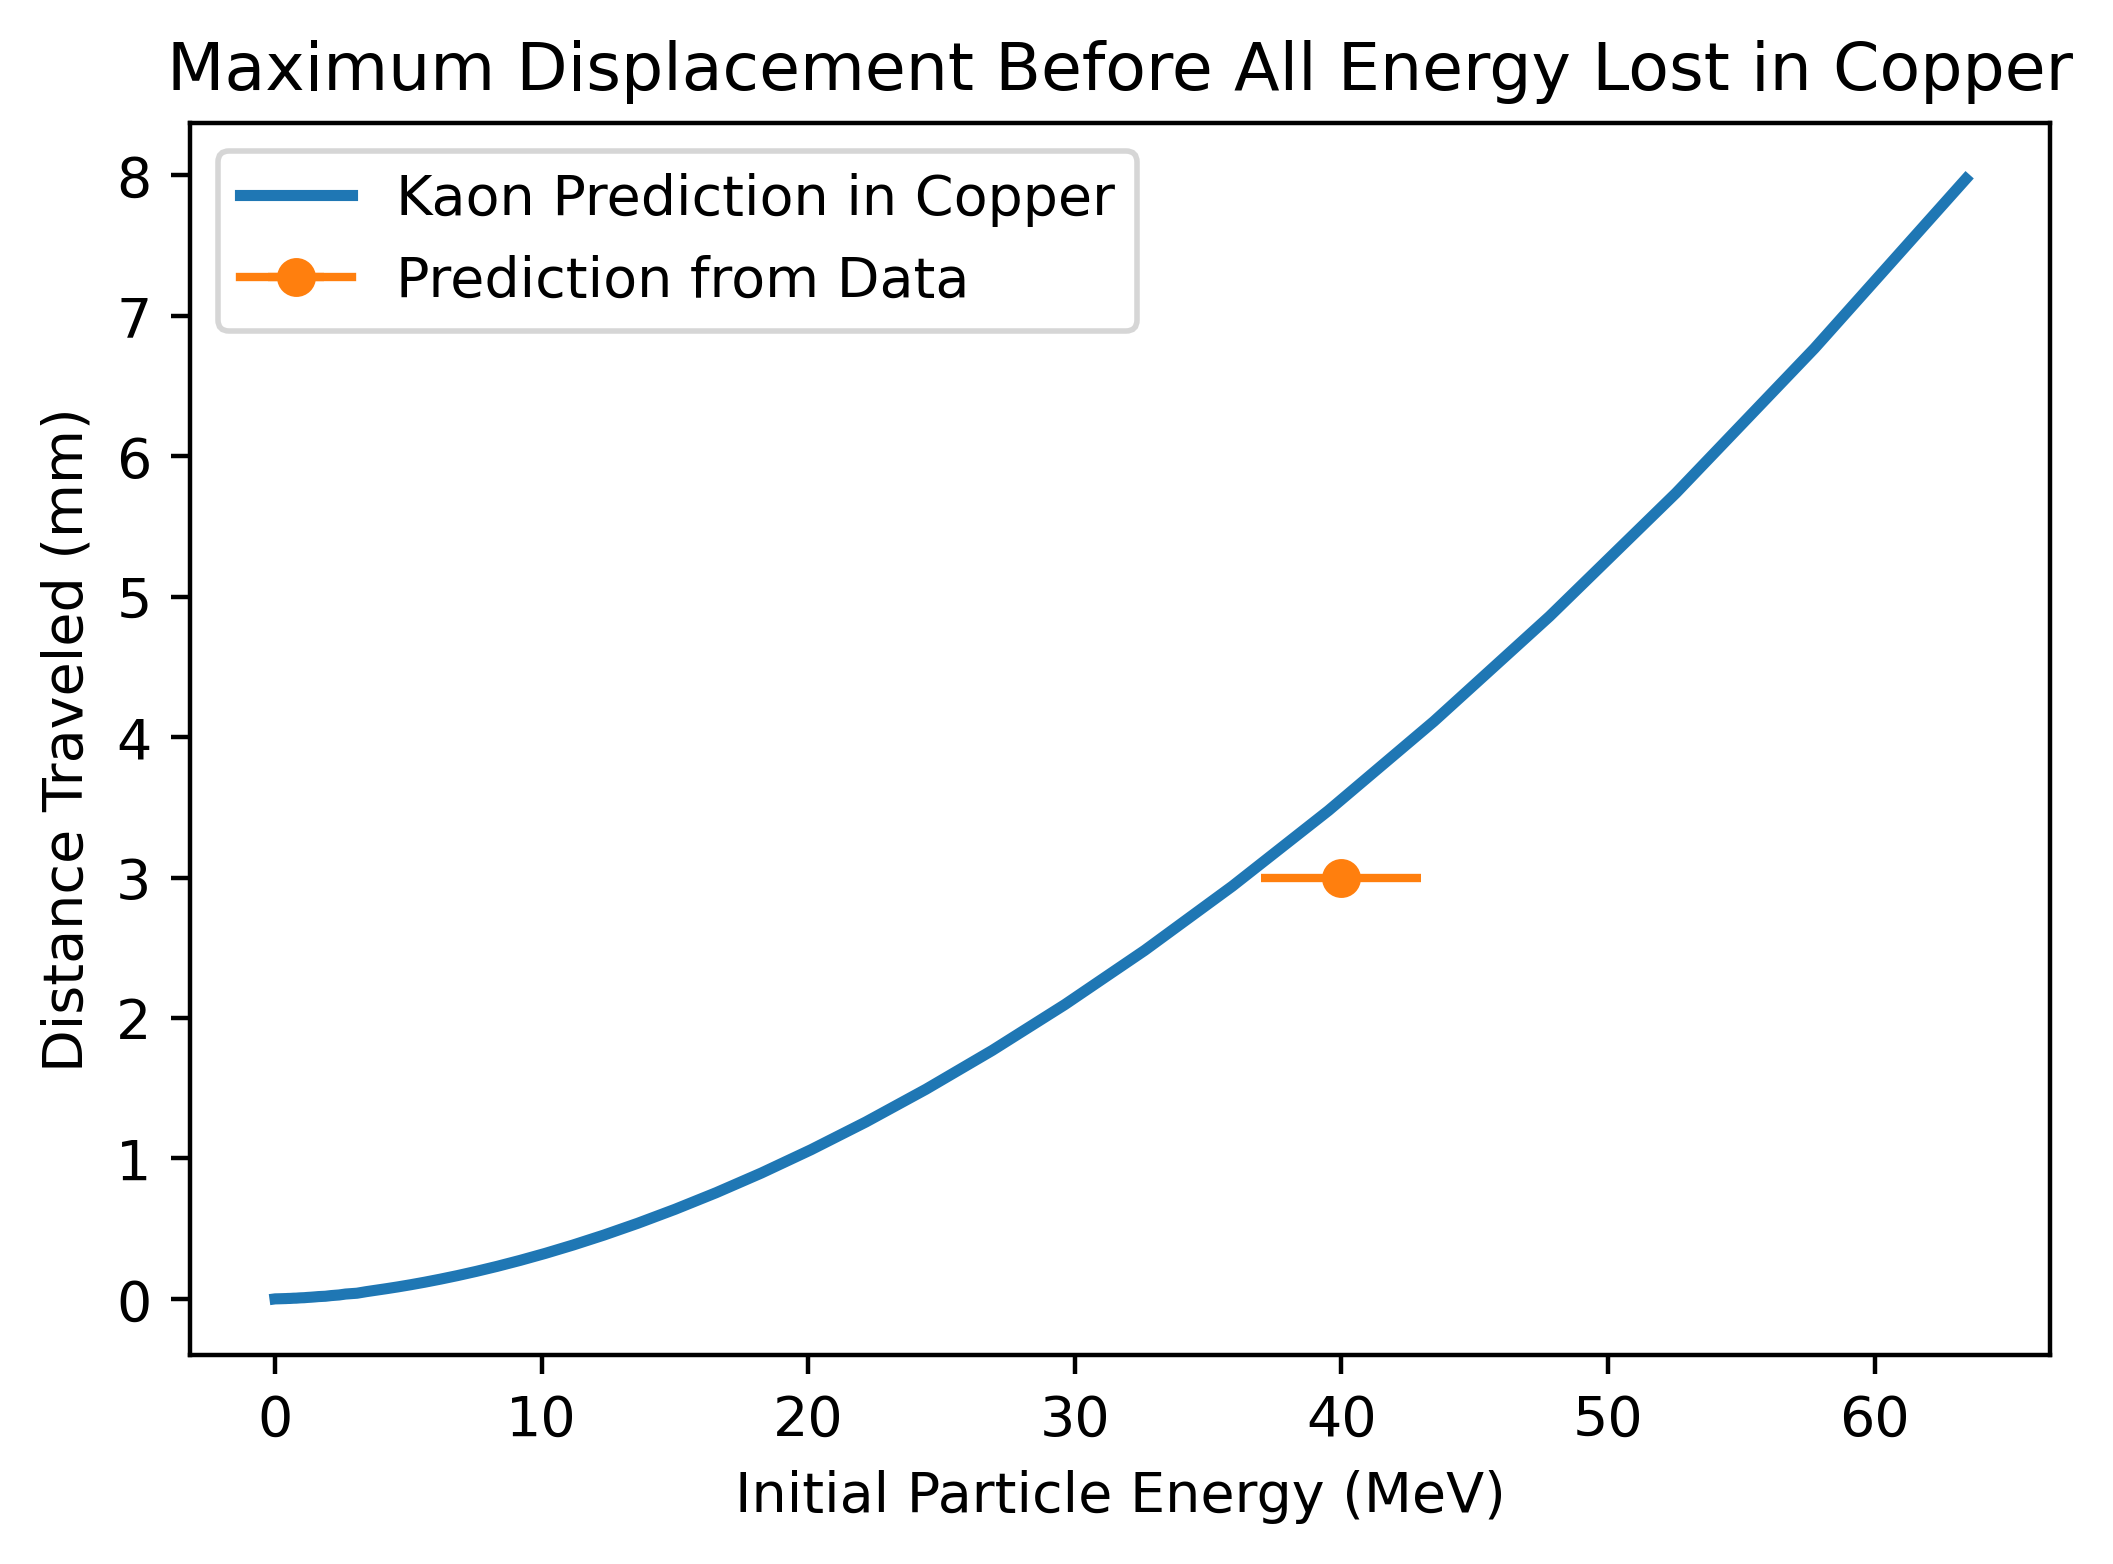

In [3]:
plt.figure(figsize=(6,4),dpi=400)
#plt.plot(energy[1:-25],z[:-25],linestyle='-',marker='',linewidth=2,label="Muon Prediction")
plt.plot(E[1:-20],x[:-20],linestyle='-',marker='',linewidth=2,label="Kaon Prediction in Copper")
plt.xlabel("Initial Particle Energy (MeV)")
plt.ylabel("Distance Traveled (mm)")
plt.errorbar(40,3,xerr=3,marker='o',label='Prediction from Data')
plt.title("Maximum Displacement Before All Energy Lost in Copper")
plt.legend()

Now We will do reconstruct z(E) for Kaons

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

density = 19.28 #g/cm^3

# import data - beta*gamma data for muons, applies to kaons
pdata = np.genfromtxt("/Users/Chris/Desktop/ldmx/ldmx_files/de_dz.csv",delimiter=',')
bg = pdata[:,0]
mc2 = 494 # rest energy of kaon
E = mc2*(np.sqrt(1+bg**2)-1)
dedz_k = pdata[:,1]*density/10

# do integral
from scipy import integrate

#limit energies to greater than 35Mev
# find index in E list where this starts, limit arrays for E and dedx
index_list = [i for i in range(len(E)) if (E[i] > 35)]
index_start = index_list[0]
E = E[index_start:]
dxde = 1/dedz_k[index_start:]

x = [] #mm, kaons
    
for i in range(1,len(dxde)):
    thisx = integrate.simpson(dxde[:i],E[:i])
    x.append(thisx)

E = E[1:]

Text(0.5, 1.0, 'Minimum energy to reach nearest silicon layer')

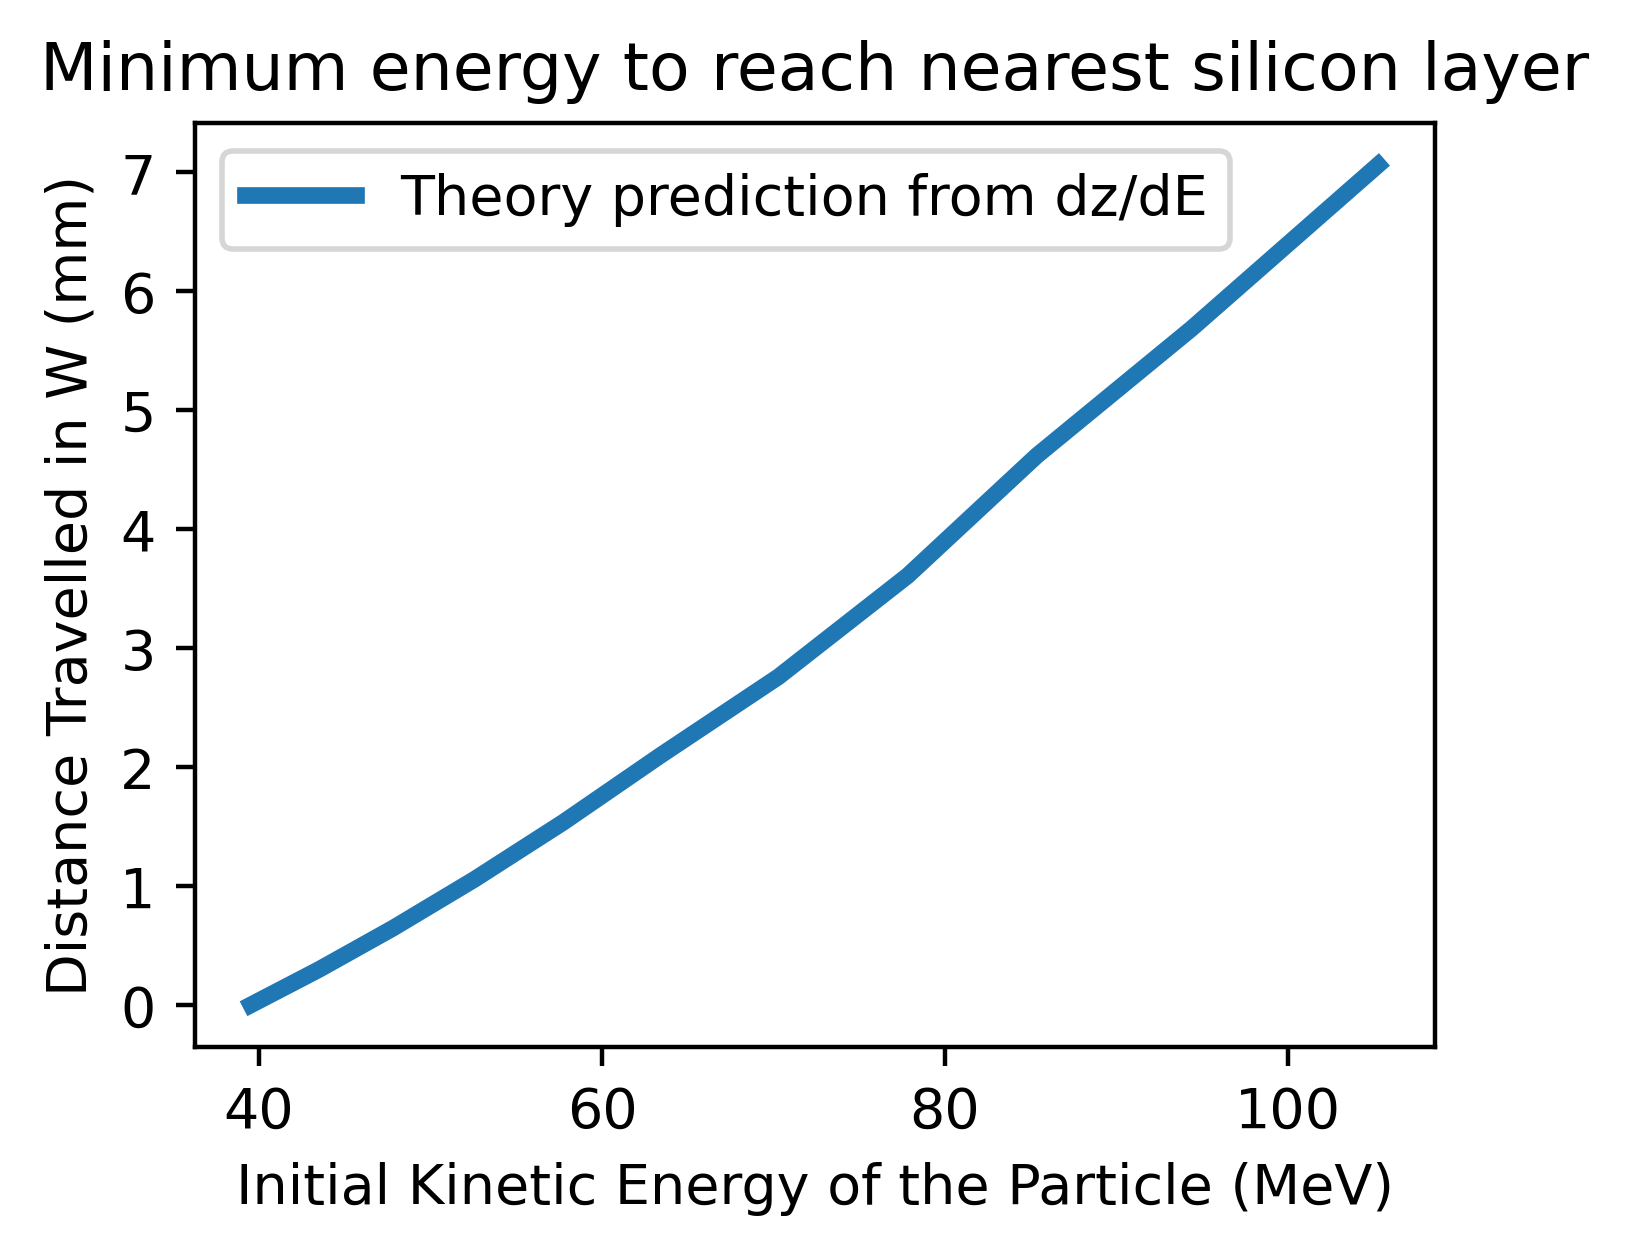

In [14]:
E_functional = [E[i] for i in range(len(E)) if E[i] < 110]
x_functional = x[:len(E_functional)]
dxde_functional = dxde[:len(E_functional)]
plt.figure(figsize=(4,3),dpi=400)
plt.plot(E_functional,x_functional,label="Theory prediction from dz/dE",linewidth=3)

# copy data and plot from other
# d layer
edatd = [80.5,79.5,78,77.5,75.5,73.5,70,66,62.5,60,56.5,53,50,46,42]
edatderr = [2]*len(edatd)
zdatd = [7,6.5,6,5.5,5,4.5,4,3.5,3,2.5,2,1.5,1,0.5,0]
# c layer
edat = [60,57.5,57,56,53.5,49,45,41.5]
edat_err = [2]*len(edat)
zdat = [3.5,3.0,2.5,2.0,1.5,1.0,0.5,0]

# plot
#plt.errorbar(edat,zdat,xerr=edat_err,marker='.',color='purple',linestyle='',label="Data from 3.5mm Layer")
#plt.errorbar(edatd,zdatd,xerr=edatderr,marker='.',color='green',linestyle='',label='Data from 7mm Layer')
plt.legend()
plt.ylabel("Distance Travelled in W (mm)")
plt.xlabel("Initial Kinetic Energy of the Particle (MeV)")
plt.title("Minimum energy to reach nearest silicon layer")

Text(0.5, 1.0, 'dx/dE in Critical Region')

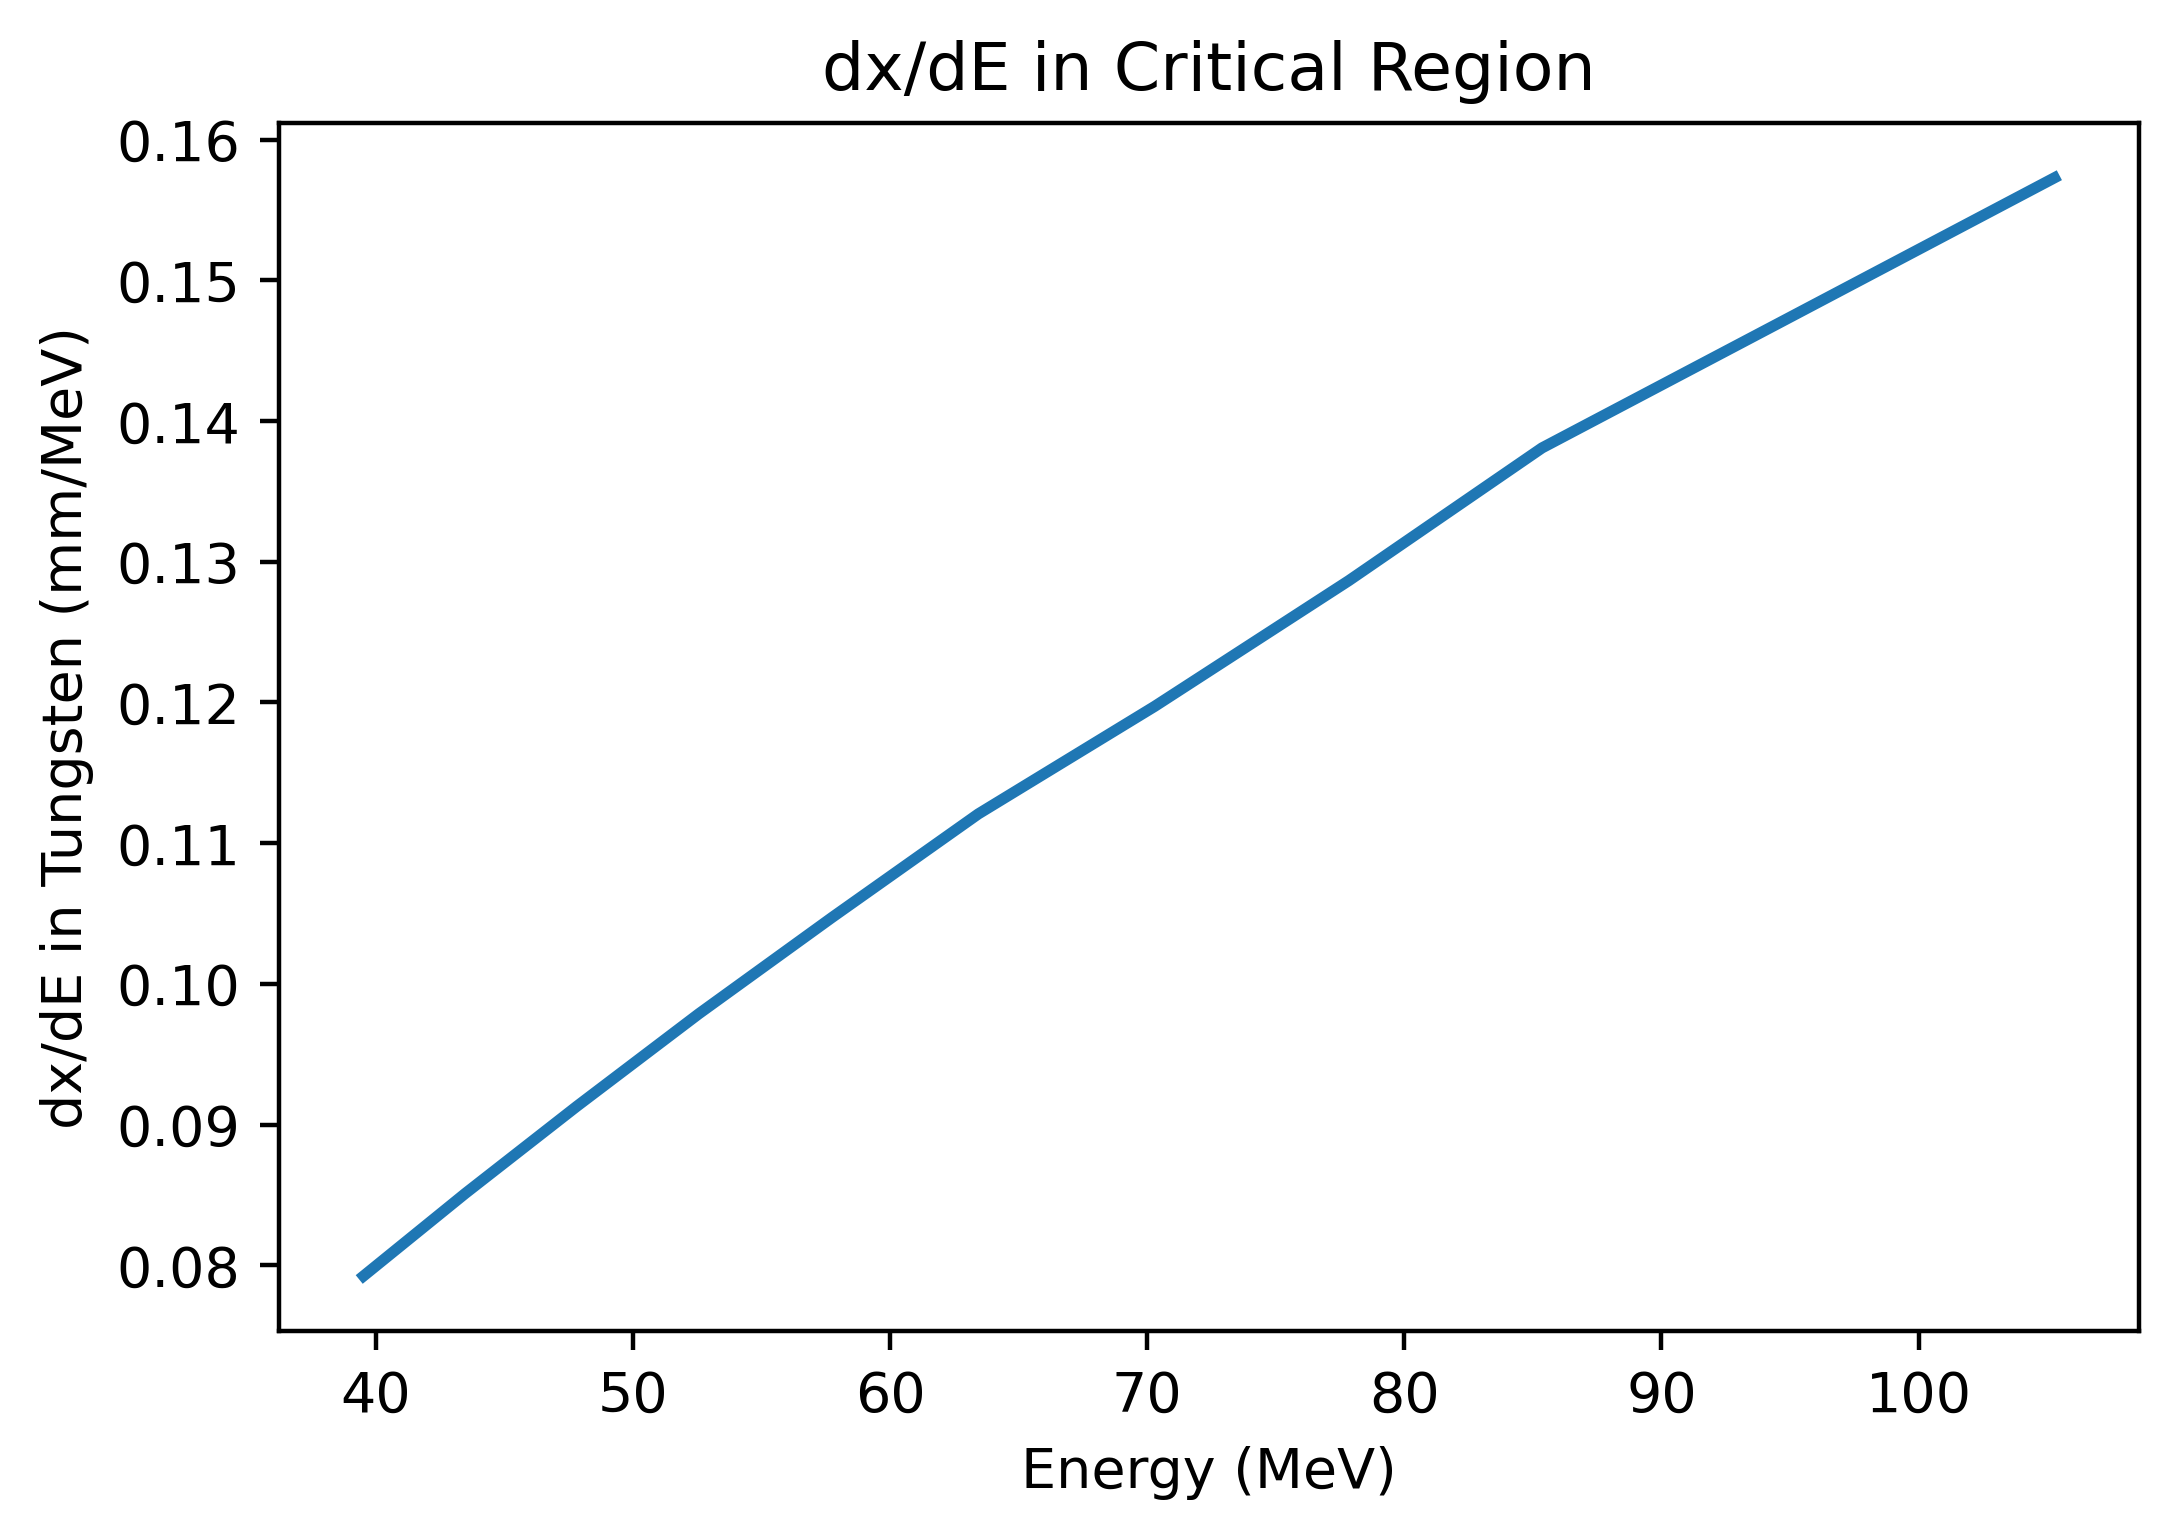

In [97]:
plt.figure(dpi=400)
plt.plot(E_functional,dxde_functional,linestyle='-',linewidth=2)
plt.xlabel("Energy (MeV)")
plt.ylabel("dx/dE in Tungsten (mm/MeV)")
plt.title("dx/dE in Critical Region")

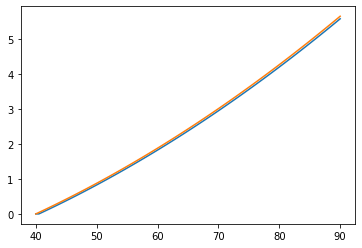

In [80]:
# integrate this new linear interpolation

integrated = np.zeros(len(espace))
for i in range(1,100):
    integrated[i] = integrate.simpson(dzdespace[:i],x=espace[:i])
    
plt.plot(espace,integrated)

plt.plot(espace,myintegral)

In [64]:
help(integrate.simpson)

Help on function simpson in module scipy.integrate._quadrature:

simpson(y, x=None, dx=1.0, axis=-1, even='avg')
    Integrate y(x) using samples along the given axis and the composite
    Simpson's rule. If x is None, spacing of dx is assumed.
    
    If there are an even number of samples, N, then there are an odd
    number of intervals (N-1), but Simpson's rule requires an even number
    of intervals. The parameter 'even' controls how this is handled.
    
    Parameters
    ----------
    y : array_like
        Array to be integrated.
    x : array_like, optional
        If given, the points at which `y` is sampled.
    dx : float, optional
        Spacing of integration points along axis of `x`. Only used when
        `x` is None. Default is 1.
    axis : int, optional
        Axis along which to integrate. Default is the last axis.
    even : str {'avg', 'first', 'last'}, optional
        'avg' : Average two results:1) use the first N-2 intervals with
                  a trape